<a href="https://colab.research.google.com/github/BernardoRMendes/Projeto/blob/main/LongVolSPX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

**Nesse estudo, iremos mostrar que , na construção de portfólios, a interação entre as estratégias é mais importante do que a performance individual de cada uma delas. Estratégias que à primeira vista parecem ruins podem gerar valor a um portfólio de ações. Para isso, foi selecionado o índice "CBOE Eurekahedge Long Volatility Hedge Fund Index". Esse índice rastreia a performance de alguns fundos que mantêm exposição comprada em volatilidade, ou seja, tendem a se beneficiar quando há aumento de incerteza no mercado.**

**Os dados foram baixados no endereço https://www.eurekahedge.com/Indices/IndexView/Eurekahedge/640/CBOE-Eurekahedge-Long-Volatility-Hedge-Fund-Index
e normalizados em planilha do excel (O SPY foi ajustado para começar em 100 na mesma data do índice Long Volatility).**

In [2]:
url="https://raw.githubusercontent.com/BernardoRMendes/Projeto/main/LongVolSPX.csv"

In [3]:
df=pd.read_csv(url,sep=';',index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 01/01/2005 to 01/01/2021
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LongVolatility  193 non-null    float64
 1   SPY             193 non-null    object 
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [5]:
df.head(20)

,LongVolatility,SPY
Date,,
01/01/2005,100.00,100
01/02/2005,100.31,"101,8903384"
01/03/2005,100.63,"99,94243484"
01/04/2005,99.56,"97,93273341"
01/05/2005,98.96,"100,8660171"
01/06/2005,99.05,"100,8516258"
01/07/2005,100.61,"104,4790776"
01/08/2005,100.48,"103,3066107"
01/09/2005,99.84,"104,0244821"


In [6]:
df.isnull().sum()

LongVolatility    0
SPY               0
dtype: int64

In [7]:
df["SPY"]=df["SPY"].str.replace(",",".")

In [8]:
df["SPY"]=df["SPY"].astype(float)
df["LongVolatility"]=df["LongVolatility"].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 01/01/2005 to 01/01/2021
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LongVolatility  193 non-null    float64
 1   SPY             193 non-null    float64
dtypes: float64(2)
memory usage: 4.5+ KB


In [10]:
df.tail(20)

,LongVolatility,SPY
Date,,
01/06/2019,173.62,249.033667
01/07/2019,171.26,252.303030
01/08/2019,169.81,247.738451
01/09/2019,175.14,251.994887
01/10/2019,172.15,257.143583
01/11/2019,170.11,265.898567
01/12/2019,167.65,273.500555
01/01/2020,165.05,273.055271
01/02/2020,165.65,250.088464


**Observando os retornos no período de Janeiro-Março/2020, percebi que as colunas não estavam alinhadas ao retorno real, então desloquei a coluna do SPY em 1 período.**

In [11]:
df["SPY"]=df["SPY"].shift(1)

In [12]:
df=df.dropna(axis=0)

**Antes da crise de 2008, muitos fundos de volatilidade, tanto os comprados como vendidos em volatilidade, se expunham nesse mercado por meio de derivativos de balcão. Após a crise e as mudanças regulatórias subsequentes no setor bancário, uma boa parte do volume feito com estratégias customizadas via balcão migrou para os produtos das exchanges.Foi nessa época também que os produtos relacionados ao VIX ganharam tração, trazendo mudanças na forma de exposição à volatilidade. Desse modo, iremos considerar retornos apenas a partir de 2010.**

In [13]:
df["SPY"]=df["SPY"][59:]
df["LongVolatility"]=df["LongVolatility"][59:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df=df.dropna(axis=0)

In [15]:
df

,LongVolatility,SPY
Date,,
01/01/2010,173.86,94.398402
01/02/2010,174.33,90.908090
01/03/2010,175.62,93.500216
01/04/2010,173.25,98.997689
01/05/2010,175.81,100.458828
...,...,...
01/09/2020,216.42,296.317523
01/10/2020,213.13,284.693593
01/11/2020,211.60,276.817324


In [16]:
df["LongVolatility"]=df["LongVolatility"]/df["LongVolatility"][0]*100
df["SPY"]=df["SPY"]/df["SPY"][0]*100

In [17]:
df.head()

,LongVolatility,SPY
Date,,
01/01/2010,100.000000,100.000000
01/02/2010,100.270332,96.302574
01/03/2010,101.012309,99.048516
01/04/2010,99.649143,104.872209
01/05/2010,101.121592,106.420052


**Você teria essa estratégia em seu portfólio?**

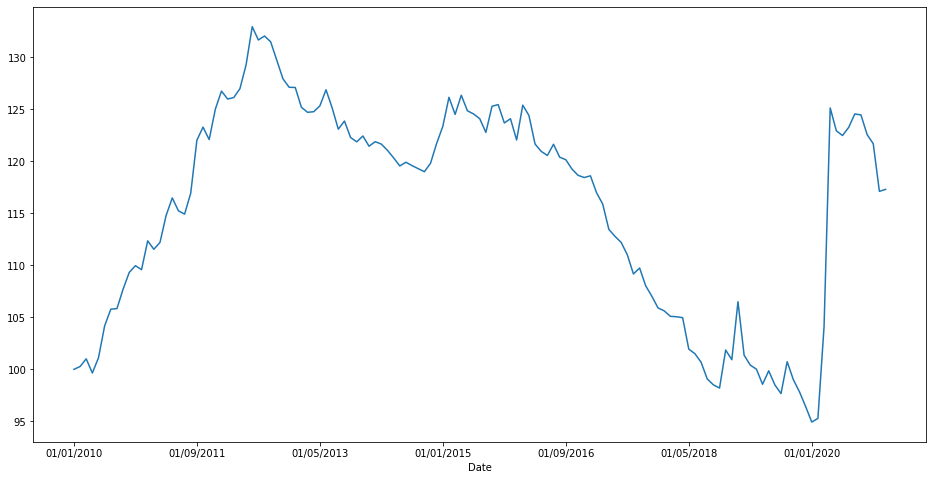

In [18]:
df["LongVolatility"].plot(figsize=(16,8))

**Comparando com o SPY:**

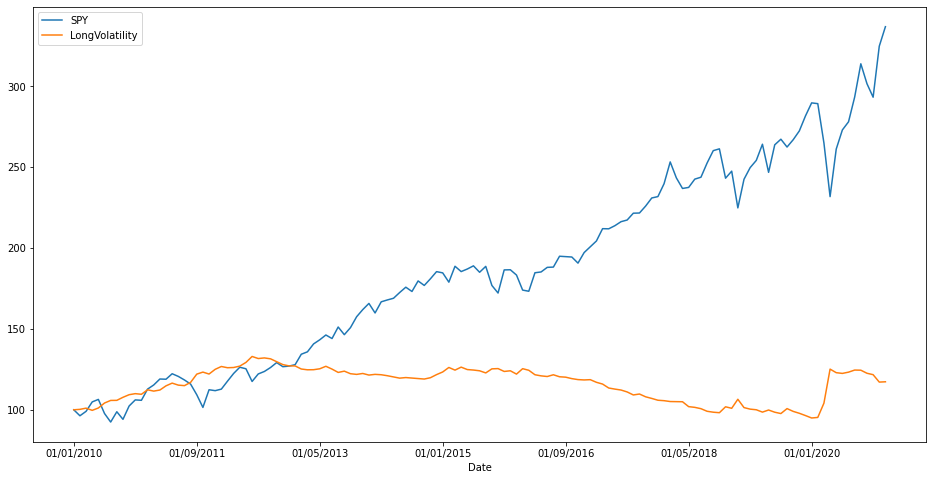

In [19]:
df[["SPY","LongVolatility"]].plot(figsize=(16,8))

In [20]:
df["SPYReturn"]=df["SPY"]/df["SPY"].shift(1)-1
df["LongVolatilityReturn"]=df["LongVolatility"]/df["LongVolatility"].shift(1)-1

In [21]:
df.head()

,LongVolatility,SPY,SPYReturn,LongVolatilityReturn
Date,,,,
01/01/2010,100.000000,100.000000,NaN,NaN
01/02/2010,100.270332,96.302574,-0.036974,0.002703
01/03/2010,101.012309,99.048516,0.028514,0.007400
01/04/2010,99.649143,104.872209,0.058796,-0.013495
01/05/2010,101.121592,106.420052,0.014759,0.014776


In [22]:
def skewness(r):
    """
    Calcula o skewness (assimetria na distribuição) dos retornos

    """
    demeaned_r = r - r.mean()
    sigma_r = r.std()
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3


def kurtosis(r):
    """
    Calcula a kurtosis da série de retornos
    """
    demeaned_r = r - r.mean()
    sigma_r = r.std()
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

                         
def annualize_rets(r, periods_per_year):
    """
    Retorno Anualizado
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1


def annualize_vol(r, periods_per_year):
    """
    Volatilidade dos retornos em formato anualizado
    """
    return r.std()*(periods_per_year**0.5)


def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Calcula o Sharpe anualizado
    """
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol


def drawdown(return_series: pd.Series):
    """Recebe uma série de retornos e
       retorna um dataframe com o valor acumulado,
       picos prévios, e o drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})


In [23]:
spy=dict()
spy["Annualized Return"]=annualize_rets(df["SPYReturn"],12)*100
spy["Annualized Vol"]=annualize_vol(df["SPYReturn"],12)*100
spy["Skewness"]=skewness(df["SPYReturn"])
spy["Kurtosis"]=kurtosis(df["SPYReturn"])
spy["Sharpe Ratio"]=sharpe_ratio(df["SPYReturn"],0,12)
spy["Max Drawdown"]=drawdown(df["SPYReturn"]).Drawdown.min()*100
spy["Calmar Ratio"]=abs(spy["Annualized Return"]/spy["Max Drawdown"])
spy=pd.DataFrame.from_dict(spy.items())
spy=spy.set_index(0)
spy.index.name=None
spy.columns=["SPY"]
LongVol=dict()
LongVol["Annualized Return"]=annualize_rets(df["LongVolatilityReturn"],12)*100
LongVol["Annualized Vol"]=annualize_vol(df["LongVolatilityReturn"],12)*100
LongVol["Skewness"]=skewness(df["LongVolatilityReturn"])
LongVol["Kurtosis"]=kurtosis(df["LongVolatilityReturn"])
LongVol["Sharpe Ratio"]=sharpe_ratio(df["LongVolatilityReturn"],0,12)
LongVol["Max Drawdown"]=drawdown(df["LongVolatilityReturn"]).Drawdown.min()*100
LongVol["Calmar Ratio"]=abs(LongVol["Annualized Return"]/LongVol["Max Drawdown"])
LongVol=pd.DataFrame.from_dict(LongVol.items())
LongVol=LongVol.set_index(0)
LongVol.index.name=None
LongVol.columns=["LongVolatility"]
portfolio=pd.concat([LongVol,spy],axis=1)

In [24]:
portfolio

,LongVolatility,SPY
Annualized Return,1.451091,11.580102
Annualized Vol,8.447673,14.073137
Skewness,4.660649,-0.312715
Kurtosis,36.799550,3.932601
Sharpe Ratio,0.171774,0.822852
Max Drawdown,-28.602327,-20.001052
Calmar Ratio,0.050733,0.578975


**Montaremos um portfólio que une o retorno das duas estratégias, mantendo 100% do notional no SPY e 100% no produto comprado em Volatilidade. Esse tipo de exposição pode ser facilmente alcançado via futuros e derivativos, sobretudo quando a gestão das duas partes é realizada pela mesma gestora, facilitando o rebalanceamento.**

**Foi considerado um custo de 0.1% ao mês**

In [25]:
df["PortfolioReturn"]=df["LongVolatilityReturn"]+df["SPYReturn"]-0.001

In [26]:
df["Portfolio"]=100*(1+df["PortfolioReturn"]).cumprod()

In [27]:
df.head()

,LongVolatility,SPY,SPYReturn,LongVolatilityReturn,PortfolioReturn,Portfolio
Date,,,,,,
01/01/2010,100.000000,100.000000,NaN,NaN,NaN,NaN
01/02/2010,100.270332,96.302574,-0.036974,0.002703,-0.035271,96.472906
01/03/2010,101.012309,99.048516,0.028514,0.007400,0.034913,99.841108
01/04/2010,99.649143,104.872209,0.058796,-0.013495,0.044301,104.264201
01/05/2010,101.121592,106.420052,0.014759,0.014776,0.028536,107.239449


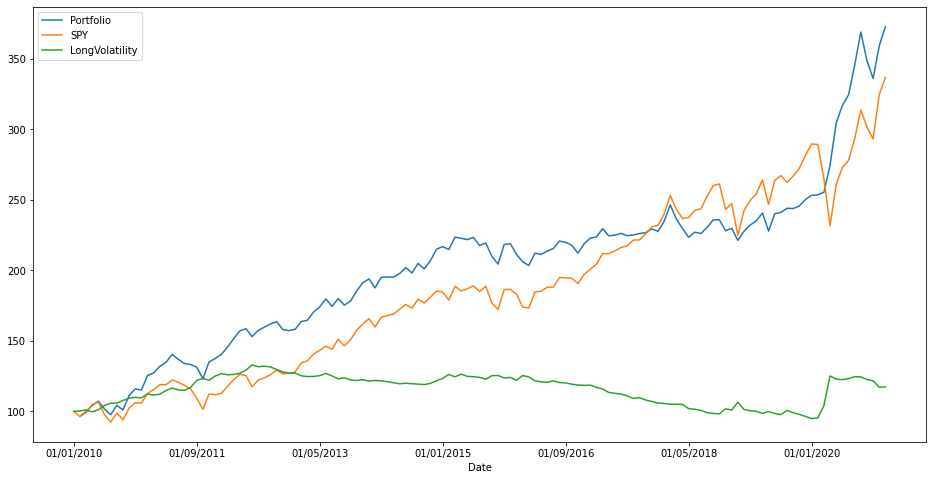

In [28]:
df[["Portfolio","SPY","LongVolatility"]].plot(figsize=(16,8))

In [29]:
port=dict()
port["Annualized Return"]=annualize_rets(df["PortfolioReturn"],12)*100
port["Annualized Vol"]=annualize_vol(df["PortfolioReturn"],12)*100
port["Skewness"]=skewness(df["PortfolioReturn"])
port["Kurtosis"]=kurtosis(df["PortfolioReturn"])
port["Sharpe Ratio"]=sharpe_ratio(df["PortfolioReturn"],0,12)
port["Max Drawdown"]=drawdown(df["PortfolioReturn"]).Drawdown.min()*100
port["Calmar Ratio"]=abs(port["Annualized Return"]/port["Max Drawdown"])
port=pd.DataFrame.from_dict(port.items())
port=port.set_index(0)
port.index.name=None
port.columns=["Portfolio"]

In [30]:
portfolio=pd.concat([portfolio,port],axis=1)

In [31]:
portfolio

,LongVolatility,SPY,Portfolio
Annualized Return,1.451091,11.580102,12.608743
Annualized Vol,8.447673,14.073137,11.387187
Skewness,4.660649,-0.312715,0.340614
Kurtosis,36.799550,3.932601,3.294003
Sharpe Ratio,0.171774,0.822852,1.107275
Max Drawdown,-28.602327,-20.001052,-12.322123
Calmar Ratio,0.050733,0.578975,1.023261


**Correlação móvel de 12 períodos entre as estratégias.**

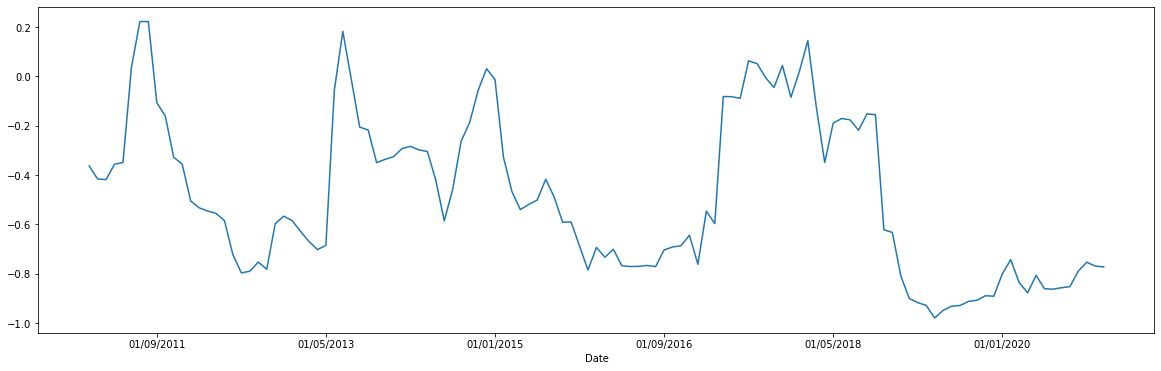

In [32]:
df['SPYReturn'].rolling(12).corr(df['LongVolatilityReturn']).plot(figsize=(20,6))

**Abaixo, definiremos a medida "Efetividade" para verificar em quantas ocasiões o portfólio Long Volatility sobe enquanto o SPY cai em janelas mensais. Para esse teste, usamos três janela de quedas do SPY.
1)Retornos entre -1% e -3%;
2)Retornos entre -3% e -5%;
3)Retornos abaixo de -5%.**

**Além disso, printaremos o número de vezes em que tais situações ocorreram.**

**Vemos que à medida que os retornos ficam mais extremos, a estratégia Long Volatility se torna mais efetiva. Ou seja, apesar de retornos ruins do SPY não serem tão frequentes, podemos construir uma estratégia que de certa forma contrabalanceie essas quedas, gerando um maior retorno anualizado (CAGR) e ainda com melhoria nas métricas de retorno ajustado ao risco,se comparado com o buy and hold do SPY.**

In [33]:
Efetividade=df[(df["SPYReturn"]<-0.01)&(df["SPYReturn"]>-0.03)&(df["LongVolatilityReturn"]>0)].shape[0]/df[(df["SPYReturn"]<-0.01)&(df["SPYReturn"]>-0.03)].shape[0]
subset_df = df[(df["SPYReturn"]<-0.01)&(df["SPYReturn"]>-0.03)]
print("Efetividade = {:.2%}".format(Efetividade))
print(subset_df.shape[0])

Efetividade = 26.67%
15


In [34]:
Efetividade=df[(df["SPYReturn"]<-0.03)&(df["SPYReturn"]>-0.05)&(df["LongVolatilityReturn"]>0)].shape[0]/df[(df["SPYReturn"]<-0.03)&(df["SPYReturn"]>-0.05)].shape[0]
subset_df = df[(df["SPYReturn"]<-0.03)&(df["SPYReturn"]>-0.05)]
print("Efetividade = {:.2%}".format(Efetividade))
print(subset_df.shape[0])

Efetividade = 71.43%
7


In [35]:
Efetividade=df[(df["SPYReturn"]<-0.05)&(df["LongVolatilityReturn"]>0)].shape[0]/df[df["SPYReturn"]<-0.05].shape[0]
subset_df = df[df["SPYReturn"]<-0.05]
print("Efetividade = {:.2%}".format(Efetividade))
print(subset_df.shape[0])

Efetividade = 100.00%
12
